<a href="https://colab.research.google.com/github/harshitha24bad034-tech/harshitha24bad034_Exp3/blob/main/exp_3_scenario1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#Harshitha 24BAD034
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance (1).csv


In [3]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")

df.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape


(1000, 8)

In [5]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


from sklearn.linear_model import LinearRegression, Ridge, Lasso


from sklearn.metrics import mean_squared_error, r2_score


In [9]:
df = pd.read_csv("StudentsPerformance.csv")


df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:

data = df.copy()

le = LabelEncoder()

data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['test preparation course'] = le.fit_transform(data['test preparation course'])


In [11]:
data['final_score'] = (
    data['math score'] +
    data['reading score'] +
    data['writing score']
) / 3


In [12]:
data.isnull().sum()


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
final_score,0


In [13]:
data_imputed = data.copy()


In [14]:
np.random.seed(42)

data_imputed['study_hours'] = np.random.randint(1, 6, size=len(data))
data_imputed['attendance'] = np.random.randint(60, 101, size=len(data))
data_imputed['sleep_hours'] = np.random.randint(4, 9, size=len(data))


In [15]:
X = data_imputed[['study_hours',
                  'attendance',
                  'parental level of education',
                  'test preparation course',
                  'sleep_hours']]

y = data_imputed['final_score']


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
y_pred = model.predict(X_test)


In [20]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 208.9678066271495


In [21]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 14.455718820838676


In [22]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.025184711046438935


In [23]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)


                       Feature  Coefficient
0                  study_hours     0.264185
1                   attendance    -0.087081
2  parental level of education    -1.021718
3      test preparation course    -3.890131
4                  sleep_hours     0.386364


In [24]:
X_reduced = data_imputed[['study_hours',
                          'attendance',
                          'sleep_hours']]

X_reduced_scaled = scaler.fit_transform(X_reduced)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced_scaled, y, test_size=0.2, random_state=42
)

model_reduced = LinearRegression()
model_reduced.fit(X_train_r, y_train_r)

y_pred_r = model_reduced.predict(X_test_r)

print("R2 after elimination:", r2_score(y_test_r, y_pred_r))


R2 after elimination: -0.0168857426917155


In [25]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge R2:", r2_score(y_test, y_pred_ridge))


Ridge R2: 0.025229744795960962


In [26]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso R2:", r2_score(y_test, y_pred_lasso))


Lasso R2: 0.027979881811471263


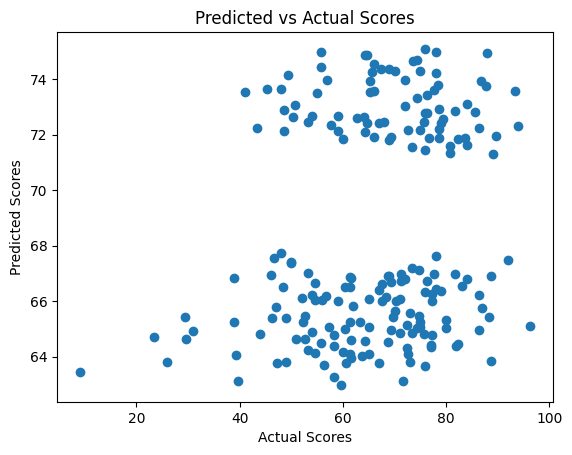

In [27]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Predicted vs Actual Scores")
plt.show()


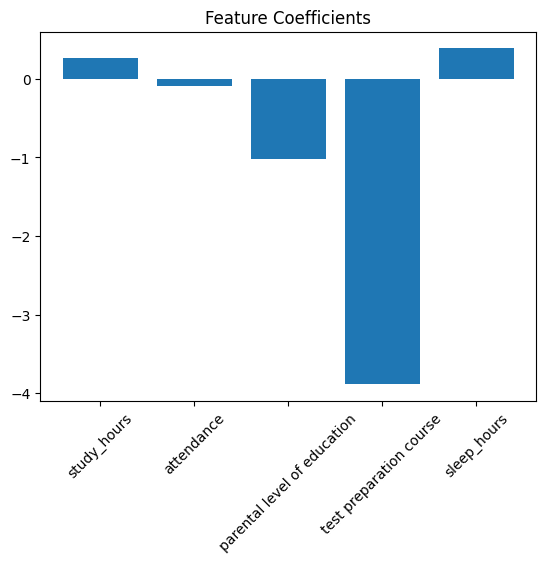

In [28]:
plt.figure()
plt.bar(X.columns, model.coef_)
plt.xticks(rotation=45)
plt.title("Feature Coefficients")
plt.show()


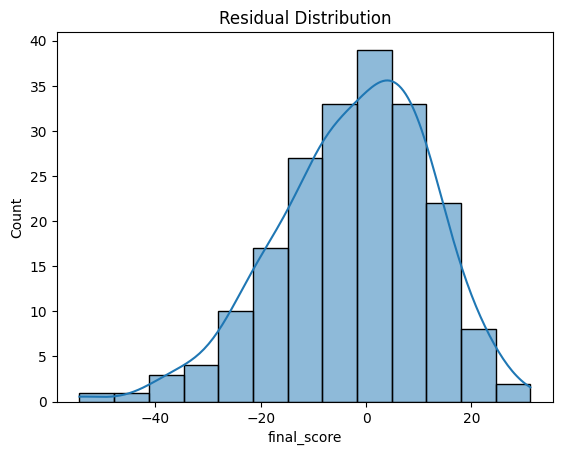

In [29]:
residuals = y_test - y_pred

plt.figure()
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()
